<a href="https://colab.research.google.com/github/Felipe34515/Trabajos-BI/blob/main/LAB1_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 1 - INTELIGENCIA DE NEGOCIOS**

Santiago Pardo - 202013025



Luis Plazas - 202013155




Felipe Rueda - 202010903

## DESCRIPCIÓN DEL PROBLEMA

### Contexto



En el vasto panorama del mundo empresarial, la comprensión profunda de los clientes es la clave para el éxito sostenible. La segmentación de clientes emerge como una poderosa herramienta estratégica que redefine la forma en que las empresas abordan sus mercados. Este proceso implica la división cuidadosa y deliberada de la base de clientes en grupos homogéneos, con características y comportamientos similares. La segmentación de clientes va más allá de la simple categorización; es la llave maestra que desbloquea el potencial de la personalización. Al centrarse en las similitudes y preferencias compartidas dentro de cada segmento, las empresas pueden anticipar las necesidades de sus clientes, crear mensajes más efectivos y diseñar productos y servicios que resuenen con precisión.



AlpesInsight, es una empresa pionera en la intersección de servicios financieros y tecnología. En su búsqueda constante para ofrecer experiencias personalizadas y seguras a sus clientes, AlpesInsight está expandiendo su equipo con la incorporación de expertos en aprendizaje automático para enfrentar el desafío de aprovechar datos de transacciones con tarjetas de crédito para comprender los patrones de comportamiento y preferencias de los clientes. AlpesInsight se esfuerza por desarrollar soluciones innovadoras que permitan personalizar ofertas financieras y servicios, mejorando así la satisfacción del cliente y fortaleciendo la seguridad de las transacciones. El equipo ha dedicido utilizar técnicas de agrupación para resolver este reto



### Diccionario de los Datos (En Inglés)



| Atributo                         | Significado                                                                                                                   |
| -------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| CUST_ID                          | Credit card holder ID                                                                                                         |
| BALANCE                          | Monthly average balance (based on daily balance averages)                                                                     |
| BALANCE_FREQUENCY                | Ratio of last 12 months with balance. (1: Frequently updated, 0: Not frequently updated)                                      |
| PURCHASES                        | Total purchase amount spent during last 12 months                                                                             |
| ONEOFF_PURCHASES                 | Total amount of one-off purchases                                                                                             |
| INSTALLMENTS_PURCHASES           | Total amount of installment purchases                                                                                         |
| CASH_ADVANCE                     | Total cash-advance amount                                                                                                     |
| PURCHASES_FREQUENCY              | Frequency of purchases (Percent of months with at least one purchase). (1: Frequently purchased, 0: Not frequently purchased) |
| ONEOFF_PURCHASES_FREQUENCY       | Frequency of one-off-purchases. (1: Frequently purchased, 0: Not frequently purchased)                                        |
| PURCHASES_INSTALLMENTS_FREQUENCY | Frequency of installment purchases. (1: Frequently purchased, 0: Not frequently purchased)                                    |
| CASHADVANCE_FREQUENCY            | Cash-Advance frequency                                                                                                        |
| CASH_ADVANCE_TRX                 | Average amount per cash-advance transaction                                                                                   |
| PURCHASES_TRX                    | Average amount per purchase transaction                                                                                       |
| CREDIT_LIMIT                     | Credit limit                                                                                                                  |
| PAYMENTS                         | Total payments (Due amount paid by the customer to decrease their statement balance) in the period                            |
| MINIMUM_PAYMENTS                 | Total minimum payments due in the period                                                                                      |
| PRC_FULL_PAYMEN                  | Percentage of months with full payment of the due statement balance                                                           |
| TENURE                           | Number of months as a customer                                                                                                |

## ENTENDIMIENTO DE LOS DATOS


### *Tablero de Control*

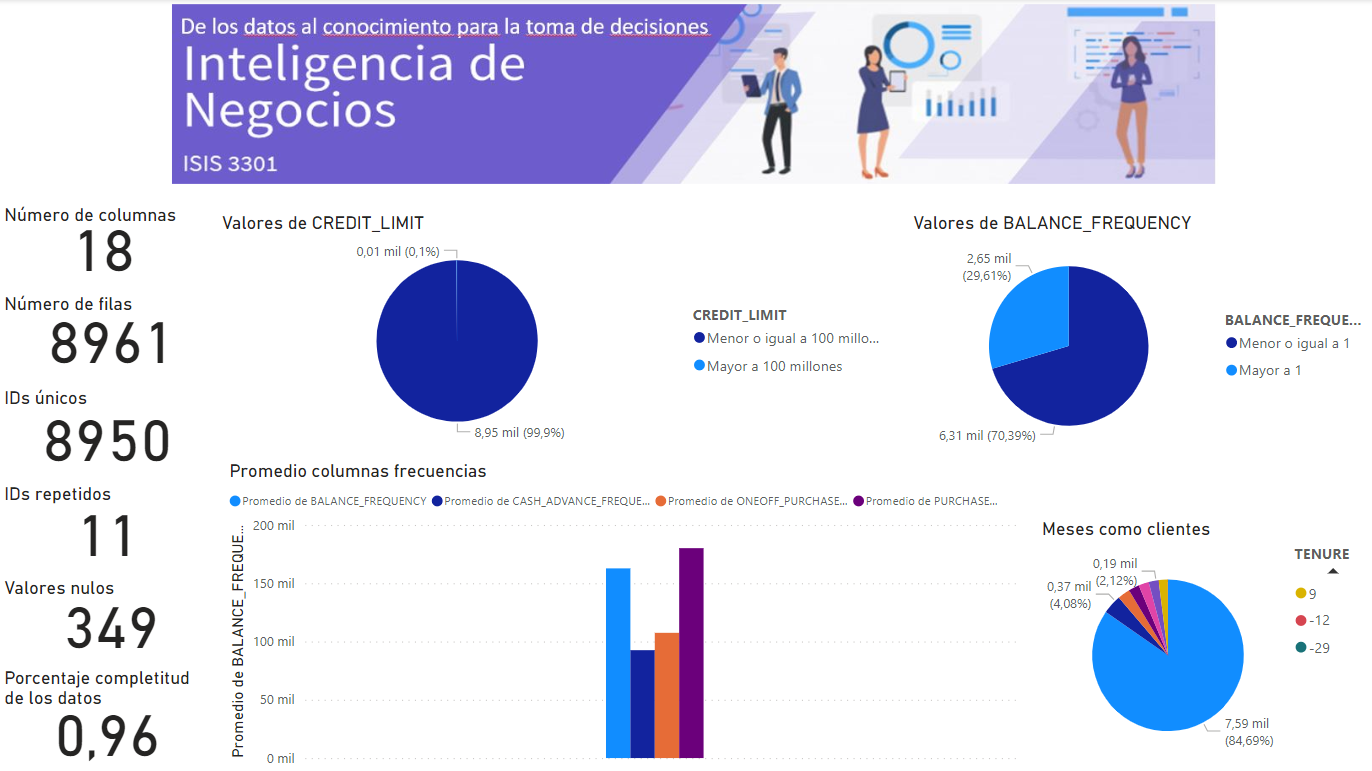


Hay datos inconsistentes en las columnas de TENURE, CREDIT_LIMIT y en las columnas de FREQUENCY. Por ejemplo en tenure se están mostrando la cantidad de meses que han sido clientes, por lo que no puede haber valores negativos. Por otro lado, hay valores de los límites de crédito que no se ajustan a la normalidad, ya que son bastante extremos. En las columnas de frecuencia deben haber valores que se encuentren entre 0 y 1, pero como se puede observar hay valores que se salen de este rango.

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
import scipy
from scipy.sparse import csgraph
from numpy import linalg as LA
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import SpectralClustering

In [2]:
#Lectura
#Luis
#df = pd.read_csv('/202410_Laboratorio 1 - Agrupación_Customer_Data.csv',sep=',')
#Santiago
df = pd.read_csv('202410_Laboratorio 1 - Agrupación_Customer_Data.csv',sep=',')
#Felipe
#df = pd.read_csv('202410_Laboratorio 1 - Agrupación_Customer_Data (1).csv',sep=',')


A continuación se muestran los diferentes tipos de datos que hay en la tabla, los valores no nulos que tienen y a que columnas corresponden.

In [3]:
# Revisar las características de los datos: completitud y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8961 non-null   object 
 1   BALANCE                           8961 non-null   object 
 2   BALANCE_FREQUENCY                 8961 non-null   float64
 3   PURCHASES                         8961 non-null   float64
 4   ONEOFF_PURCHASES                  8961 non-null   float64
 5   INSTALLMENTS_PURCHASES            8961 non-null   float64
 6   CASH_ADVANCE                      8951 non-null   float64
 7   PURCHASES_FREQUENCY               8961 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8948 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8961 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8961 non-null   float64
 11  CASH_ADVANCE_TRX                  8961 non-null   int64  
 12  PURCHA

También se pueden saber diferentes valores de las tablas, como sus valores máximos, minimos, su mediana y el conteo de los datos que hay en tales columnas

In [4]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8961.000000,8961.000000,8961.000000,8961.000000,8951.000000,8961.000000,8948.000000,8961.000000,8961.000000,8961.000000,8961.000000,8954.000000,8961.000000,8648.000000,8961.000000,8961.000000
mean,0.877337,1002.463128,591.909000,410.853942,975.911735,0.490390,0.205296,0.364427,0.135100,3.247071,14.701149,4492.107229,1732.346476,863.799380,0.153667,11.504520
std,0.236860,2135.454287,1658.954815,903.861664,2092.854438,0.401300,0.343200,0.397426,0.200037,6.820915,24.844201,3638.086840,2893.903128,2371.003422,0.292467,1.469939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.456400,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,-29.000000
25%,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1562.500000,383.282850,169.163545,0.000000,12.000000
50%,1.000000,361.730000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.843792,312.684092,0.000000,12.000000
75%,1.000000,1109.830000,576.000000,468.650000,1112.868860,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1899.738286,825.496463,0.142857,12.000000
max,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,9.666670,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# PERFILAMIENTO DE DATOS

En primer lugar, se hizo una visualización preliminar de los datos y cómo se visualizan en principio, y si a ojo propio, se puede ver alguna otra inconsistencia además de las mencionadas en la etapa de entendimiento de los datos.

In [5]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,NaN,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8956,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8957,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8958,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8959,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### *Eliminación de datos nulos*

Lo primero que se realizará en esta limpieza de datos es eliminar todos los datos nulos, ya que según el análisis realizado en el entendimiento de los datos, se encontraron 349 valores nulos, en comparación a los 8961 datos totales, la eliminación de dichos datos no generaría cambios significativos dentro de los modelos, teniendo en cuenta otros indicadores como el índice de completitud y nuevamente, la cantidad de valores nulos encontrados.

In [6]:
#Total de Datos sin Limpieza
df.shape[0]

8961

In [7]:
#Eliminación de datos nulos
df_clean_na = df.dropna()

In [8]:
#Total de Datos con Eliminación de Datos Nulos
df_clean_na.shape[0]

8619

In [9]:
#Datos Nulos Encontrados
df.shape[0] - df_clean_na.shape[0]

342

Por lo que de esta eliminación, se puede ver que se eliminaron 342 datos, lo cual es cercano al número de valores nulos encontrados en el entendimiento de los datos encontrado (349)

### *Atributos de Frecuencia*

De acuerdo al diccionario de los datos, varios de los valores de ciertos atributos deben estar dentro de un rango asociado entre 0 y 1, estos atributos son:

BALANCE_FREQUENCY



PURCHASES_FREQUENCY



ONE_OFF_PURCHASES_FREQUENCY



PURCHASES_INSTALLMENS_FREQUENCY



CASH_ADVANCE_FREQUENCY



De acuerdo con el entendimiento, existen valores que no cumplen dichas condiciones en los atributos ONE_OFF_PURCHASES_FREQUENCY y CASH_ADVANCE_FREQUENCY, por lo cual, en esta etapa se eliminarán dichos datos inconsistentes de estos atributos

In [10]:
#Eliminación de Datos
#Columna ONEOFF_PURCHASES_FREQUENCY
df_oopf = df_clean_na[(df_clean_na['ONEOFF_PURCHASES_FREQUENCY'] >= 0) & (df_clean_na['ONEOFF_PURCHASES_FREQUENCY'] <= 1)]
df_clean_na.shape[0] - df_oopf.shape[0]

12

Se eliminaron 12 datos en los cuales no se cumplía el rango de frecuencia para el atributo ONE_OFF_PURCHASES_FREQUENCY

In [11]:
#Eliminación de Datos
#Columna CASH_ADVANCE_FREQUENCY
df_caf = df_clean_na[(df_clean_na['CASH_ADVANCE_FREQUENCY'] >= 0) & (df_clean_na['CASH_ADVANCE_FREQUENCY'] <= 1)]
df_clean_na.shape[0] - df_caf.shape[0]

8

Se eliminaron 8 datos en los cuales no se cumplía el rango de frecuencia para el atributo CASH_ADVANCE_FREQUENCY

In [12]:
#Almacenar variables para futuras limpiezas
df_frequencies = df_oopf[(df_oopf['CASH_ADVANCE_FREQUENCY'] >= 0) & (df_oopf['CASH_ADVANCE_FREQUENCY'] <= 1)]
df_clean_na.shape[0] - df_frequencies.shape[0]

20

En total, se eliminaron 20 datos que tenían inconsistencia del rango de frecuencia

### *Atributos de Cantidad de Meses*

Concretamente, para el atributo TENURE, se encontró que representaba la cantidad de meses (0-12), según el entendimiento de los datos, se encontraron valores menores a 0, por lo cual, en esta etapa se realizó la eliminación de dichos datos

In [13]:
#Eliminar datos con meses negativos
df_tenure = df_frequencies[(df_frequencies['TENURE'] >= 0) & (df_frequencies['TENURE'] <= 12)]
df_frequencies.shape[0] - df_tenure.shape[0]

4

En total, se eliminaron 4 datos que tenían inconsistencia con la cantidad de meses

### *Atributo ID (CUST_ID)*

Por lógica de la aplicación, cada id (perteneciente al atributo CUST_ID) debe ser único, por lo que una consistencia del sistema es encontrar un id duplicado, por lo cual, según el entendimiento de los datos, se encontraron 11 id's duplicados, por lo que en esta etapa, se tratará de eliminar dichos datos con el objetivo de mantener la coherencia y lógica de la aplicación.


Mediante el siguiente comando, se comprueba que en efecto, existen 11 datos, los cuales tienen id duplicados, por lo que el objetivo es que dichos datos en concreto, sean eliminados

In [14]:
df_tenure.shape[0] - df_tenure['CUST_ID'].unique().shape[0]

11

In [15]:
#Comando para Eliminar los Ids Duplicados
df_clean_id = df_tenure.drop_duplicates(subset='CUST_ID',keep='first')

In [16]:
#Comprobar que los datos fueron eliminados
df_tenure.shape[0] - df_clean_id.shape[0]

11

In [17]:
df_clean_id.shape

(8584, 18)

### *Atributo BALANCE*

Según el entendimiento de los datos, el atributo BALANCE presenta datos inconsistentes con el contexto, ya que contiene caracteres en medio de los números, por lo cual el objetivo de esta etapa es eliminar estos datos y delimitar el tipo de dato de este atributo a numérico únicamente (actualmente se encuentra como objeto)

In [18]:
df_balance = pd.to_numeric(df_clean_id['BALANCE'], errors='coerce')

In [19]:
df_clean_id['BALANCE'] = df_balance

<ipython-input-19-05ccd31c8032>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_id['BALANCE'] = df_balance


Mediante este comando, comprobamos que a pesar de que no se eliminó ningún dato (estos datos problemáticos probablemente se eliminaron en etapas anteriores), el tipo de dato tuvo un cambio en el tipo, el cual es de float64, tal y como es el tipo de los otros datos numéricos del dataset

In [20]:
df_clean_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8584 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8584 non-null   object 
 1   BALANCE                           8578 non-null   float64
 2   BALANCE_FREQUENCY                 8584 non-null   float64
 3   PURCHASES                         8584 non-null   float64
 4   ONEOFF_PURCHASES                  8584 non-null   float64
 5   INSTALLMENTS_PURCHASES            8584 non-null   float64
 6   CASH_ADVANCE                      8584 non-null   float64
 7   PURCHASES_FREQUENCY               8584 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8584 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8584 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8584 non-null   float64
 11  CASH_ADVANCE_TRX                  8584 non-null   int64  
 12  PURCHA

In [21]:
df_clean_id.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.578000e+03,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000
mean,3.111737e+05,0.894875,1027.247112,605.455316,422.104777,990.006772,0.496727,0.205950,0.369535,0.136378,3.288677,15.064888,4516.726250,1783.696349,864.777647,0.159882,11.538211
std,2.052079e+07,0.207958,2170.836385,1687.225317,918.884602,2118.558840,0.401176,0.300150,0.398093,0.198908,6.835824,25.220373,3660.341075,2912.618835,2379.200223,0.296733,1.304482
min,-2.112921e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,1.461020e+02,0.909091,44.412500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1587.500000,417.889656,168.938095,0.000000,12.000000
50%,9.128947e+02,1.000000,377.825000,44.755000,95.935000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,897.748023,310.336181,0.000000,12.000000
75%,2.092024e+03,1.000000,1146.862500,600.000000,486.835000,1125.307197,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1949.049982,819.717133,0.166667,12.000000
max,1.534969e+09,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


No obstante, se encontró que este atributo BALANCE presenta una desviación estándar muy grande, lo cual implica que los datos tienen una variablidad muy alta, y por ende, no se tomarán en cuenta estos datos para el modelo debido a que serán "problemáticos" en cuanto a la detección de outliers y su importancia en el resultado de los modelos

### *Atributo PURCHASES*

Según el contexto y explicación del contexto de los datos, se encontró una correlación entre 3 atributos de este dataset, de la siguiente forma


*PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES*

Por lo que en los datos podrían existir valores en los cuales no se cumpla esta relación, por lo cual, el objetivo de esta etapa es reemplazar los valores de purchases para que se cumpla la relación, de modo que no se requiere eliminar ningún dato, sino únicamente cambiar el valor de un atributo en caso de que no sea necesario

In [22]:
df_clean_id['PURCHASES'] = df_clean_id['ONEOFF_PURCHASES'] + df_clean_id['INSTALLMENTS_PURCHASES']

<ipython-input-22-348d53cfbd2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_id['PURCHASES'] = df_clean_id['ONEOFF_PURCHASES'] + df_clean_id['INSTALLMENTS_PURCHASES']


In [23]:
df_clean_id.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.578000e+03,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000
mean,3.111737e+05,0.894875,1027.560093,605.455316,422.104777,990.006772,0.496727,0.205950,0.369535,0.136378,3.288677,15.064888,4516.726250,1783.696349,864.777647,0.159882,11.538211
std,2.052079e+07,0.207958,2170.938360,1687.225317,918.884602,2118.558840,0.401176,0.300150,0.398093,0.198908,6.835824,25.220373,3660.341075,2912.618835,2379.200223,0.296733,1.304482
min,-2.112921e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,1.461020e+02,0.909091,44.662500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1587.500000,417.889656,168.938095,0.000000,12.000000
50%,9.128947e+02,1.000000,378.785000,44.755000,95.935000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,897.748023,310.336181,0.000000,12.000000
75%,2.092024e+03,1.000000,1146.862500,600.000000,486.835000,1125.307197,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1949.049982,819.717133,0.166667,12.000000
max,1.534969e+09,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Observando el describe de las etapas anteriores, se puede observar que hubo cambios menores al no alterar directamente la media ni la desviación estándar, mientras que en los valores de los cuartiles hubo cambios poco significativo, por lo que en este dataset, la mayoría de los datos cumplían con esta relación.

### *Detección de Outliers*

Para este modelo también fue necesario hacer la detección de outliers, que se realizó mediante varios diagramas de cajas, que posteriormente permiten realizar este análisis mediante el método estadístico de rangos intercuartiles.

Como aclaración importante y tal y como se vio en etapas anteriores, se descartó el uso del atributo BALANCE dentro del modelo debido a que luego de eliminar los valores con caracteres de por medio, se encontró que los datos poseían una desviación estándar y variabilidad muy alta, por lo que son datos de los cuales no se puede concluir mucha información al respecto.

In [24]:
credit_limit_g = df_clean_id[['CREDIT_LIMIT']].melt()
purchases_g = df_clean_id[['PURCHASES']].melt()
purchases_trx_g = df_clean_id[['PURCHASES_TRX']].melt()
oneoff_purchases_g = df_clean_id[['ONEOFF_PURCHASES']].melt()
installment_purchases_g = df_clean_id[['INSTALLMENTS_PURCHASES']].melt()
cash_advance_g = df_clean_id[['CASH_ADVANCE']].melt()
cash_advance_trx_g = df_clean_id[['CASH_ADVANCE_TRX']].melt()
payments_g = df_clean_id[['PAYMENTS']].melt()
minimum_payments_g = df_clean_id[['MINIMUM_PAYMENTS']].melt()

Se realizó la gráfica por separado del atributo CREDIT_LIMIT, dado que la inconsistencia de los datos fue detectada en la etapa de entendimiento de los datos, por ende, es necesario eliminar varios datos con el objetivo de mejorar el rendimiento de los modelos y mantener la coherencia del contexto del problema.

Text(0.5, 1.0, 'Diagrama de Caja para Detección de Outliers')

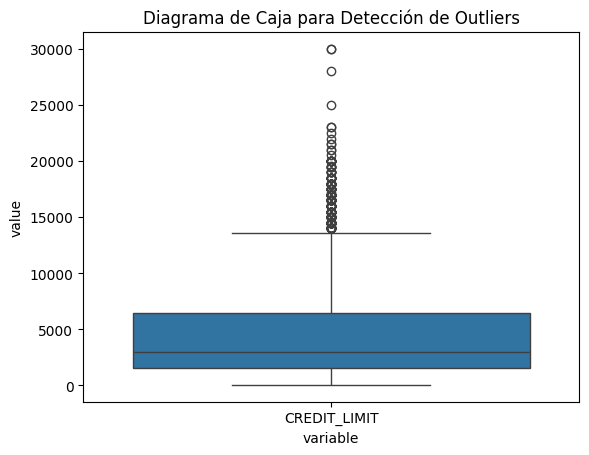

In [25]:
sns.boxplot(x="variable",y="value",data=credit_limit_g)
plt.title("Diagrama de Caja para Detección de Outliers")

Se hará los siguientes diagramas de caja de aquellos atributos, los cuales no pertenezcan a algún rango en específico (es decir, no se utilizan los atributos que contengan alguna frecuencia o porcentaje, porque se encuentran delimitados)

<Axes: xlabel='variable', ylabel='value'>

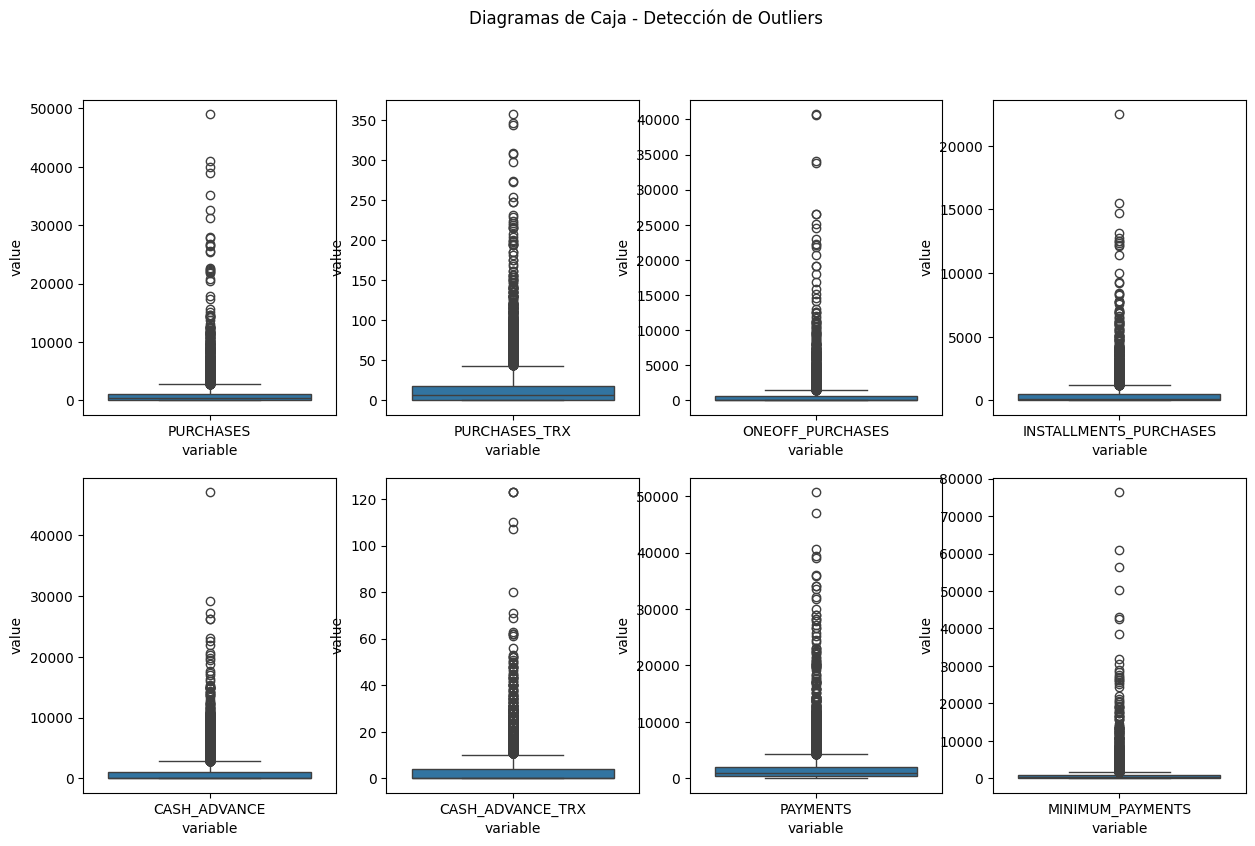

In [26]:
fig, axes = plt.subplots(2,4,figsize=(15,9))
fig.suptitle('Diagramas de Caja - Detección de Outliers')
sns.boxplot(x="variable",y="value",data=purchases_g,ax=axes[0][0])
sns.boxplot(x="variable",y="value",data=purchases_trx_g,ax=axes[0][1])
sns.boxplot(x="variable",y="value",data=oneoff_purchases_g,ax=axes[0][2])
sns.boxplot(x="variable",y="value",data=installment_purchases_g,ax=axes[0][3])
sns.boxplot(x="variable",y="value",data=cash_advance_g,ax=axes[1][0])
sns.boxplot(x="variable",y="value",data=cash_advance_trx_g,ax=axes[1][1])
sns.boxplot(x="variable",y="value",data=payments_g,ax=axes[1][2])
sns.boxplot(x="variable",y="value",data=minimum_payments_g,ax=axes[1][3])

Para este análisis, se escogió no eliminar aquellos outliers en los atributos mencionados en esta gráfica, ya que visualmente se puede observar que se perderían muchos datos si se eliminan dichos outliers y se realiza una intersección de los conjuntos de todos los outliers detectados en estos atributos. Por lo cual, únicamente se utilizó el atributo CREDIT_LIMIT para eliminar los outliers.

#### *Método de Rangos Intercuartiles*

En esta etapa, habiendo identificando los outliers del atributo CREDIT_LIMIT gráficamente, se utilizará el método de rangos intercuartiles para identificar dichos outliers y eliminarlos de los datos resultantes

In [27]:
q1_cl = df_clean_id['CREDIT_LIMIT'].quantile(0.25)
q3_cl = df_clean_id['CREDIT_LIMIT'].quantile(0.75)
iqr_cl = q3_cl - q1_cl

In [28]:
lower_limit = q1_cl - 1.5*iqr_cl
upper_limit = q3_cl + 1.5*iqr_cl

In [29]:
print(lower_limit, upper_limit)

-5781.25 13868.75


In [30]:
#Procedimiento para únicamente seleccionar valores dentro del límite establecido en los rangos intercuartiles
df_cl = df_clean_id[(df_clean_id['CREDIT_LIMIT'] >= lower_limit) & (df_clean_id['CREDIT_LIMIT'] <= upper_limit)]

In [31]:
df_clean_id.shape[0] - df_cl.shape[0]

243

In [32]:
df_cl.shape[0]

8341

En general, se eliminaron aproximadamente 243 outliers de este procedimiento, por lo cual, el total de datos que se utilizarán en el modelo será de 8341 datos

### *Limpieza Final de Datos*

Luego de haber eliminado los outliers correspondientes al atriibuto CREDIT_LIMIT, se eliminarán varios atributos que no so significativos dentro del modelo y tienen alta correlación con otros modelos. Estos atributos son CUST_ID y BALANCE por parte de que no son significativos y ONEOFF_PURCHASES y INSTALLMENTS_PURCHASES por parte de que tienen una alta correlación con el atributo PURCHASES

In [33]:
df_clean = df_cl.drop(columns=['CUST_ID','BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES'])

Por lo que el modelo recibirá como entrada 8341 datos con 14 atributos

In [34]:
df_clean.shape

(8341, 14)

A continuación, se hace un breve resumen de los datos luego del perfilamiento de los datos

In [35]:
df_clean.describe()

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000
mean,0.894230,929.237160,948.057662,0.492284,0.199232,0.366321,0.135371,3.249371,14.377892,4165.475139,1633.667147,837.686817,0.156898,11.530032
std,0.208460,1708.818031,1942.597513,0.400694,0.294368,0.397378,0.197168,6.691232,23.539764,3040.588901,2380.668576,2368.833646,0.293387,1.315729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,0.909091,39.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,409.037304,168.173968,0.000000,12.000000
50%,1.000000,365.900000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,867.272423,304.823458,0.000000,12.000000
75%,1.000000,1093.930000,1105.738809,0.916667,0.272727,0.750000,0.250000,4.000000,17.000000,6000.000000,1868.475426,786.588160,0.166667,12.000000
max,1.000000,35131.160000,27296.485760,1.000000,1.000000,1.000000,1.000000,123.000000,347.000000,13600.000000,39461.965800,76406.207520,1.000000,12.000000


### *Datos Listos para Modelos*

Antes de tener los datos listos para los modelos, es necesario normalizar cada dataset con el objetivo principal de que todos los datos contribuyan por igual al modelo

In [36]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_clean)

Se creó una copia de cada dataset luego de realizar la limpieza con el objetivo de utilizar cada copia en cada algoritmo y luego anotar los resultados de la agrupación

In [37]:
df_clean_kmeans = df_clean
df_clean_dbscan = df_clean
df_clean_sc = df_clean

## MODELAMIENTO

A continuación, se va a dar la explicación para los 3 algoritmos que se van a utilizar con estos datos

### *Selección de Modelos*

Se van a utilizar 3 modelos de agrupación para estos datos

#### *K-Means Clustering*

El algoritmo K-Means se emplea en el análisis de datos y el aprendizaje automático para agrupar datos en conjuntos similares, con el objetivo de encontrar k grupos (donde k es predefinido) que minimicen la distancia promedio entre los puntos de cada grupo. El proceso comienza seleccionando k puntos aleatorios como centros iniciales de los clusters. Posteriormente, cada punto de datos se asigna al grupo cuyo centro esté más cercano según la distancia euclidiana.

Una vez asignados todos los puntos a un grupo, se calcula el centroide de cada grupo, que representa el punto medio de todos los puntos del grupo. Estos centroides se convierten en los nuevos centros de los grupos. Este procedimiento se repite iterativamente, con los puntos reasignándose a los grupos más cercanos en cada iteración y recalculándose los centroides. El algoritmo se detiene cuando los centroides de los grupos ya no cambian significativamente o cuando se alcanza un número máximo de iteraciones.


Una vez concluido el proceso de agrupación, los grupos resultantes pueden utilizarse para analizar los datos y tomar decisiones fundamentadas basadas en las similitudes y diferencias entre ellos.

A pesar de sus beneficios, el algoritmo K-Means presenta algunas limitaciones. Por ejemplo, no siempre logra encontrar la solución óptima debido a posibles mínimos locales, influenciados por la selección inicial aleatoria de los centros de los grupos. Además, el número de grupos debe ser definido previamente, y si esta elección no es adecuada, los resultados de la agrupación pueden carecer de utilidad. El método se basa en la distancia euclidiana, lo que lo hace efectivo para datos con límites de grupos lineales, pero puede producir agrupaciones imprecisas o ineficaces en casos de límites no lineales o complejos. En el contexto del algoritmo K-Means mencionado, se utilizó el método del codo y el coeficiente de silueta para seleccionar de manera óptima el número de grupos.

Las ventajas del algoritmo k-means incluyen:

Es fácil de implementar y entender.
Es eficiente en términos computacionales.
Funciona bien con grandes conjuntos de datos.
Las desventajas del algoritmo k-means incluyen:

Es sensible a la inicialización de los centroides.
No garantiza la convergencia al resultado óptimo global.
No es adecuado para datos con formas irregulares o tamaños de clúster desiguales.
Requiere que se especifique el número de clusters de antemano.




#### *DBSCAN*

El algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un método de agrupamiento basado en densidad. Funciona de la siguiente forma:

Para cada observación miramos el número de puntos a una distancia máxima ε de ella. Esta zona se denomina ε-vecindad de la observación.
Si una observación tiene al menos un cierto número de vecinos, incluida ella misma, se considera una observación central. En este caso, se ha detectado una observación de alta densidad.
Todas las observaciones en la vecindad de una observación central pertenecen al mismo clúster. Puede haber observaciones centrales cercanas entre sí. Por lo tanto, de un paso a otro, se obtiene una larga secuencia de observaciones centrales que constituyen un único clúster.
Cualquier observación que no sea una observación central y que no tenga ninguna observación central en su vecindad se considera una anomalía.
Por tanto, es necesario definir dos datos antes de utilizar DBSCAN:

¿Qué distancia ε hay que determinar para cada observación la ε-vecindad? ¿Cuál es el número mínimo de vecinos necesario para considerar una observación como una observación central?

Estos dos datos son facilitados libremente por el usuario. A diferencia del algoritmo k-means o de la clasificación jerárquica ascendente, no es necesario definir de antemano el número de clústeres, lo que hace que el algoritmo sea menos rígido.

Las ventajas del algoritmo DBSCAN incluyen:

Permite gestionar los valores atípicos o las anomalías.
Es un algoritmo eficiente.
Es robusto a ruido.
Es adecuado para una variedad de problemas de clustering.
Las desventajas del algoritmo DBSCAN incluyen:

Puede ser difícil elegir los parámetros eps y minPts.
No es adecuado para problemas en los que los clusters tienen formas regulares.
Para este modelo, se deben encontrar 2 parámetros con el objetivo de encontrar el mejor modelo, estos parámetros son el epsilon, el cual representa la distancia máxima entre 2 muestras para ser considerados como vecinos, y el parámetro min_samples, que consiste en el número de muestras que un vecindario considera como un punto principal o Core Point.

#### *Spectral Clustering*

Las técnicas de agrupamiento espectral hacen uso del espectro (valores propios) de la matriz de similitud de los datos para realizar reducción de dimensionalidad antes de la agrupación en un menor número de dimensiones. La matriz de similitud se proporciona como una entrada y consta de una evaluación cuantitativa de la similitud relativa de cada par de puntos en el conjunto de datos.. El algoritmo Spectral Clustering es un método de agrupamiento que se basa en la teoría de grafos. AFunciona de la siguiente forma:


Se define un grafo que contenga la información de similitud entre puntos: Se define un grafo G = (V, E), donde V es el conjunto de nodos que contiene las observaciones xi y E es el conjunto de enlaces entre nodos. Cada enlace tiene un peso que hace referencia a la similitud/distancia entre dos observaciones.

Selecciona un conjunto de enlaces para cortar el grafo: Si el grafo es conexo, se selecciona un conjunto de enlaces para cortar el grafo. Los pesos de estos enlaces deben sumar lo menos posible, considerando que los pesos representan la similitud entre dos observaciones².
Formula el objetivo del clustering en términos de grafos: El objetivo es encontrar particiones del grafo tal que los enlaces entre estas particiones tengan el menor peso posible.

Las ventajas del algoritmo Spectral Clustering incluyen:

Es capaz de encontrar clusters con formas arbitrarias en los datos.
La técnica implica la representación de los datos en una baja dimensión, lo que permite una mayor separación de los clusters.
Puede ser útil cuando se conoce el número de clusters, pero el algoritmo también ofrece un modo de calcular el número de clusters en los datos.

Las desventajas del algoritmo Spectral Clustering incluyen:

Puede ser computacionalmente costoso para conjuntos de datos grandes.
La elección de la función de similitud puede ser no trivial y tener un gran impacto en los resultados.
No es directamente aplicable a datos categóricos.




### *Modelo 1: K-Means Clustering (Luis Plazas)*

In [ ]:
df_clean_kmeans

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
2,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
4,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12
5,1.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
8,1.000000,861.49,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8954,0.500000,20.90,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8956,1.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8958,0.833333,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8959,0.833333,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


In [ ]:
#Preparación relacionada con el tipo B. Tipo de tarea de aprendizaje
#Vamos a seleccionar únicamente un subconjunto de variables numéricas para facilitar la creación del modelo
cols_select=["PURCHASES_TRX", "PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CREDIT_LIMIT"]
df_kmeans_model=df_clean_kmeans[cols_select].copy()

In [ ]:
df_kmeans_model

,PURCHASES_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT
0,2,0.166667,0.000000,1000.0
2,12,1.000000,0.000000,7500.0
4,1,0.083333,0.000000,1200.0
5,8,0.666667,0.000000,1800.0
8,5,0.333333,0.000000,7000.0
...,...,...,...,...
8954,1,0.166667,0.000000,500.0
8956,6,1.000000,0.000000,1000.0
8958,5,0.833333,0.000000,1000.0
8959,0,0.000000,0.166667,500.0


In [ ]:
# Empezar el modelo con 2 clusters
model_kmeans = KMeans(n_clusters=2, random_state=0)

In [ ]:
res_kmeans = model_kmeans.fit(df_kmeans_model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
res_kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

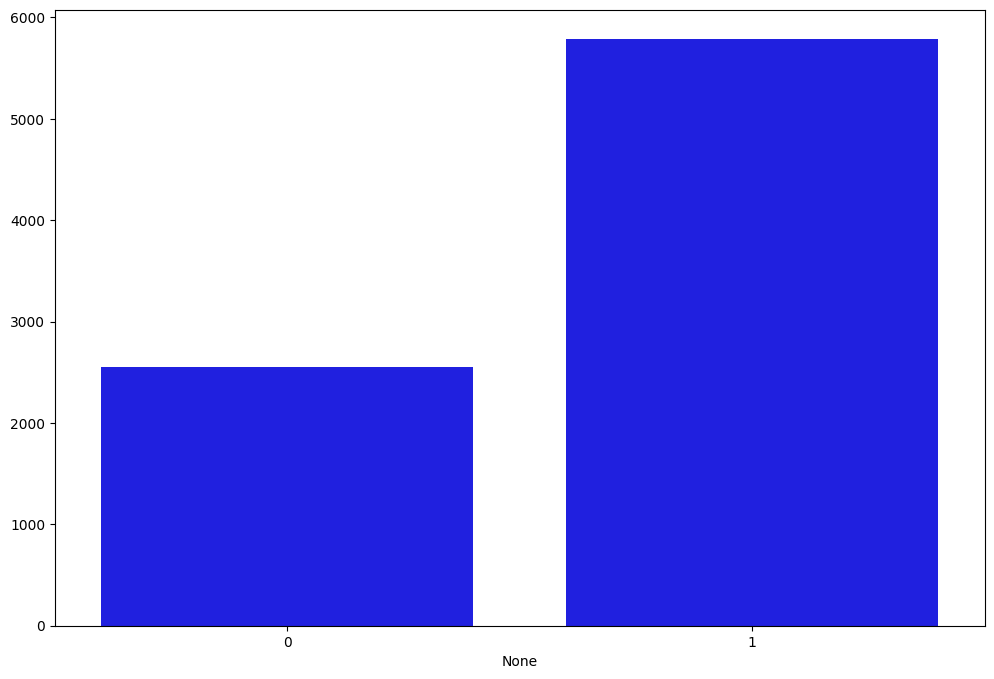

In [ ]:
# Revisar la cantidad de registros en los grupos resultado
labels = res_kmeans.labels_
df_kmeans_model['Cluster'] = labels

cluster_distrib = df_kmeans_model['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [ ]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_kmeans_model.groupby('Cluster').count()

,PURCHASES_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT
Cluster,,,,
0,2554,2554,2554,2554
1,5787,5787,5787,5787


In [ ]:
#Transformar el contenido de las columnas a arreglo para facilitar aplicar funciones como las de visualización
cols_number = df_kmeans_model.to_numpy()
cols_number

array([[2.00000e+00, 1.66667e-01, 0.00000e+00, 1.00000e+03, 1.00000e+00],
       [1.20000e+01, 1.00000e+00, 0.00000e+00, 7.50000e+03, 0.00000e+00],
       [1.00000e+00, 8.33330e-02, 0.00000e+00, 1.20000e+03, 1.00000e+00],
       ...,
       [5.00000e+00, 8.33333e-01, 0.00000e+00, 1.00000e+03, 1.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.66667e-01, 5.00000e+02, 1.00000e+00],
       [2.30000e+01, 6.66667e-01, 3.33333e-01, 1.20000e+03, 1.00000e+00]])

In [ ]:
df_kmeans_model

,PURCHASES_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,Cluster
0,2,0.166667,0.000000,1000.0,1
2,12,1.000000,0.000000,7500.0,0
4,1,0.083333,0.000000,1200.0,1
5,8,0.666667,0.000000,1800.0,1
8,5,0.333333,0.000000,7000.0,0
...,...,...,...,...,...
8954,1,0.166667,0.000000,500.0,1
8956,6,1.000000,0.000000,1000.0,1
8958,5,0.833333,0.000000,1000.0,1
8959,0,0.000000,0.166667,500.0,1


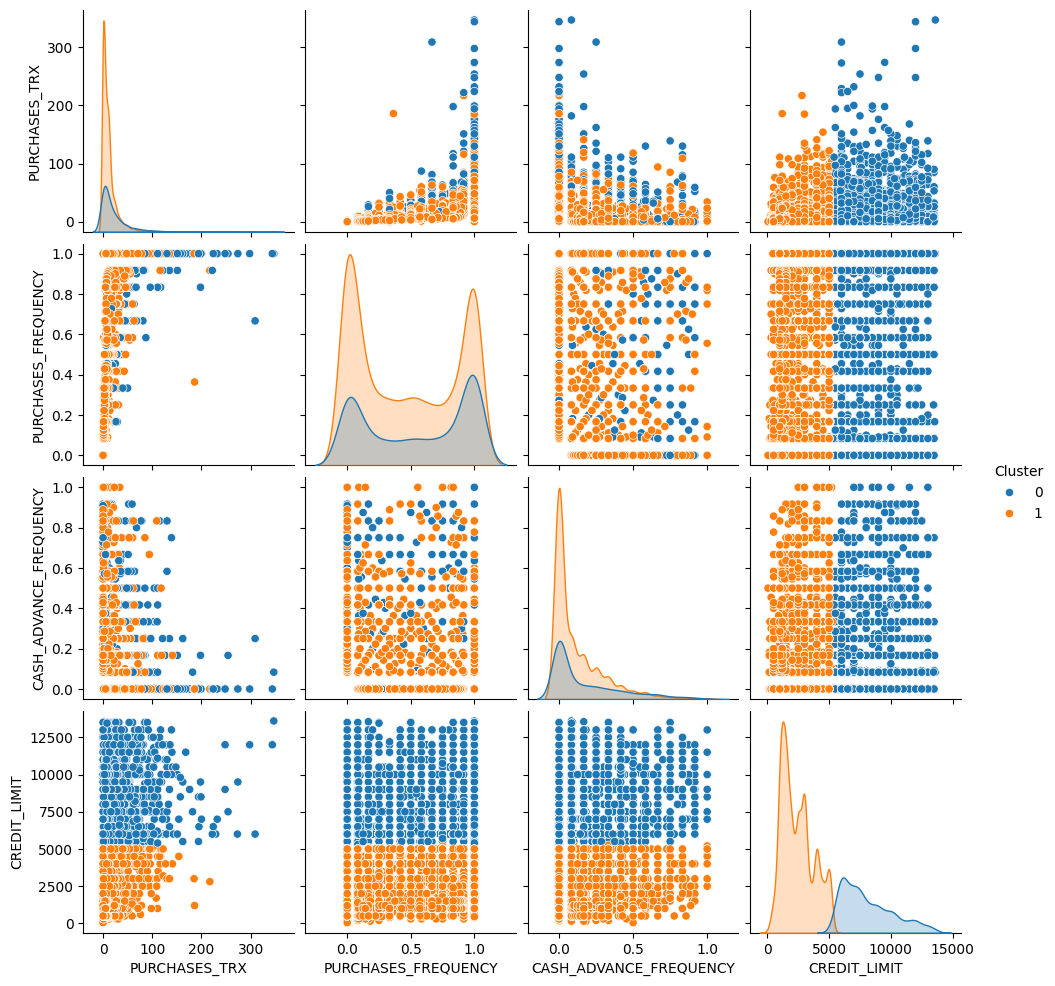

In [ ]:
sns.pairplot(data=df_kmeans_model, hue="Cluster")

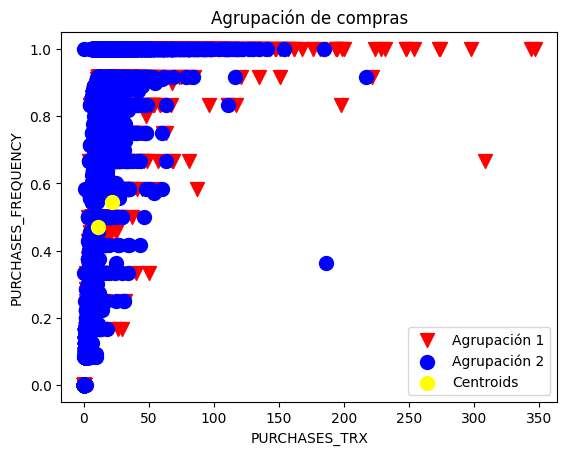

In [ ]:
# Ver gráficamente en dos dimensiones -de acuerdo con el análisis de la gráfica anterior- las diferentes agrupaciones para poderlas describir mejor
plt.scatter(cols_number[labels == 0, 0], cols_number[labels == 0, 1], s = 100, marker='v', c = 'red', label = 'Agrupación 1')
plt.scatter(cols_number[labels == 1, 0], cols_number[labels == 1, 1], s = 100, marker='o', c = 'blue', label = 'Agrupación 2')

plt.scatter(res_kmeans.cluster_centers_[:, 0], res_kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Agrupación de compras')
plt.xlabel(cols_select[0])
plt.ylabel(cols_select[1])
plt.legend()
plt.show()


In [ ]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data,
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters

    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1]


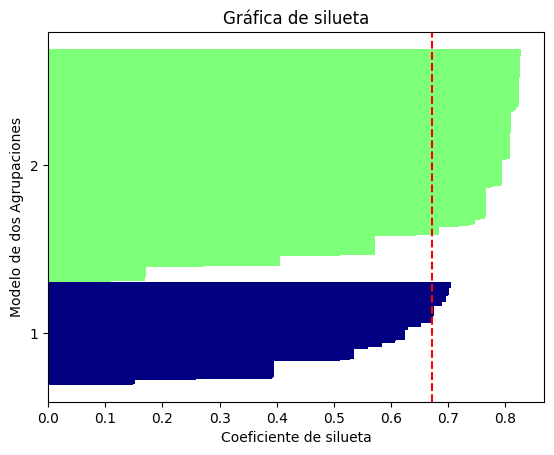

In [ ]:

# Un valor cercano a 1 es un indicador de un bueno modelo.
plot_silhouette(data = df_kmeans_model,
                labels = res_kmeans.labels_,
                ylabel = 'Modelo de dos Agrupaciones')

Observamos que el coeficiente de la silueta es bastante bajo, por lo que vamos al método del codo para observar cual podría ser el número de clusters requerido

In [ ]:
def plot_distortion(data,
                    k_min=1,
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters

    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y
    title : string
        El titulo de la gráfica
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

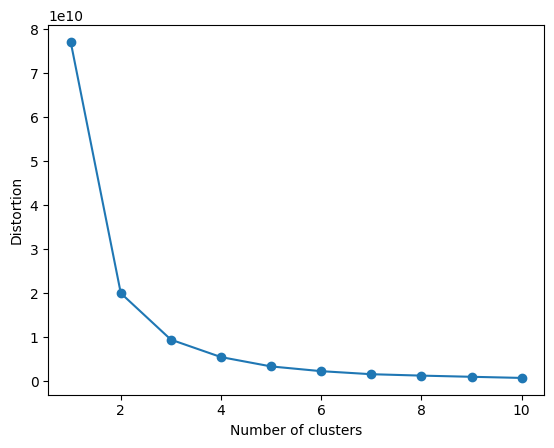

In [ ]:
# En este gráfico vemos el punto en que cambia la pendiente y ese es el número sugerido para el valor de k o número de grupos.
plot_distortion(df_kmeans_model[cols_select],1,11)

Se puede observar que el codo está en 2, pero igual se va a realizar el mismo proceso con 3 clusters para ver las diferencias

In [ ]:
#Preparación relacionada con el tipo B. Tipo de tarea de aprendizaje
#Vamos a seleccionar únicamente un subconjunto de variables numéricas para facilitar la creación del modelo
cols_select=["PURCHASES_TRX", "PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CREDIT_LIMIT"]
df_kmeans_model=df_clean_kmeans[cols_select].copy()

In [ ]:
# Ahora probar con 3 clusters

model_kmeans = KMeans(n_clusters=3, random_state=0)

In [ ]:
res_kmeans = model_kmeans.fit(df_kmeans_model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
res_kmeans.labels_

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

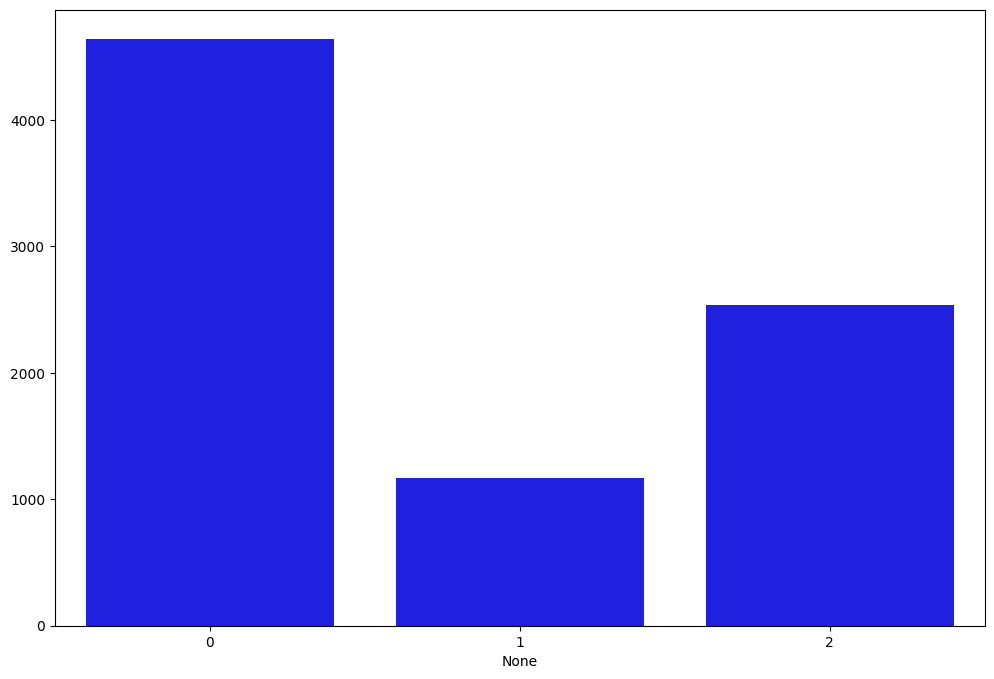

In [ ]:
# Revisar la cantidad de registros en los grupos resultado
labels = res_kmeans.labels_
df_kmeans_model['Cluster'] = labels

cluster_distrib = df_kmeans_model['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [ ]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_kmeans_model.groupby('Cluster').count()

,PURCHASES_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT
Cluster,,,,
0,4638,4638,4638,4638
1,1169,1169,1169,1169
2,2534,2534,2534,2534


In [ ]:
#Transformar el contenido de las columnas a arreglo para facilitar aplicar funciones como las de visualización
cols_number = df_kmeans_model.to_numpy()
cols_number

array([[2.00000e+00, 1.66667e-01, 0.00000e+00, 1.00000e+03, 0.00000e+00],
       [1.20000e+01, 1.00000e+00, 0.00000e+00, 7.50000e+03, 2.00000e+00],
       [1.00000e+00, 8.33330e-02, 0.00000e+00, 1.20000e+03, 0.00000e+00],
       ...,
       [5.00000e+00, 8.33333e-01, 0.00000e+00, 1.00000e+03, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.66667e-01, 5.00000e+02, 0.00000e+00],
       [2.30000e+01, 6.66667e-01, 3.33333e-01, 1.20000e+03, 0.00000e+00]])

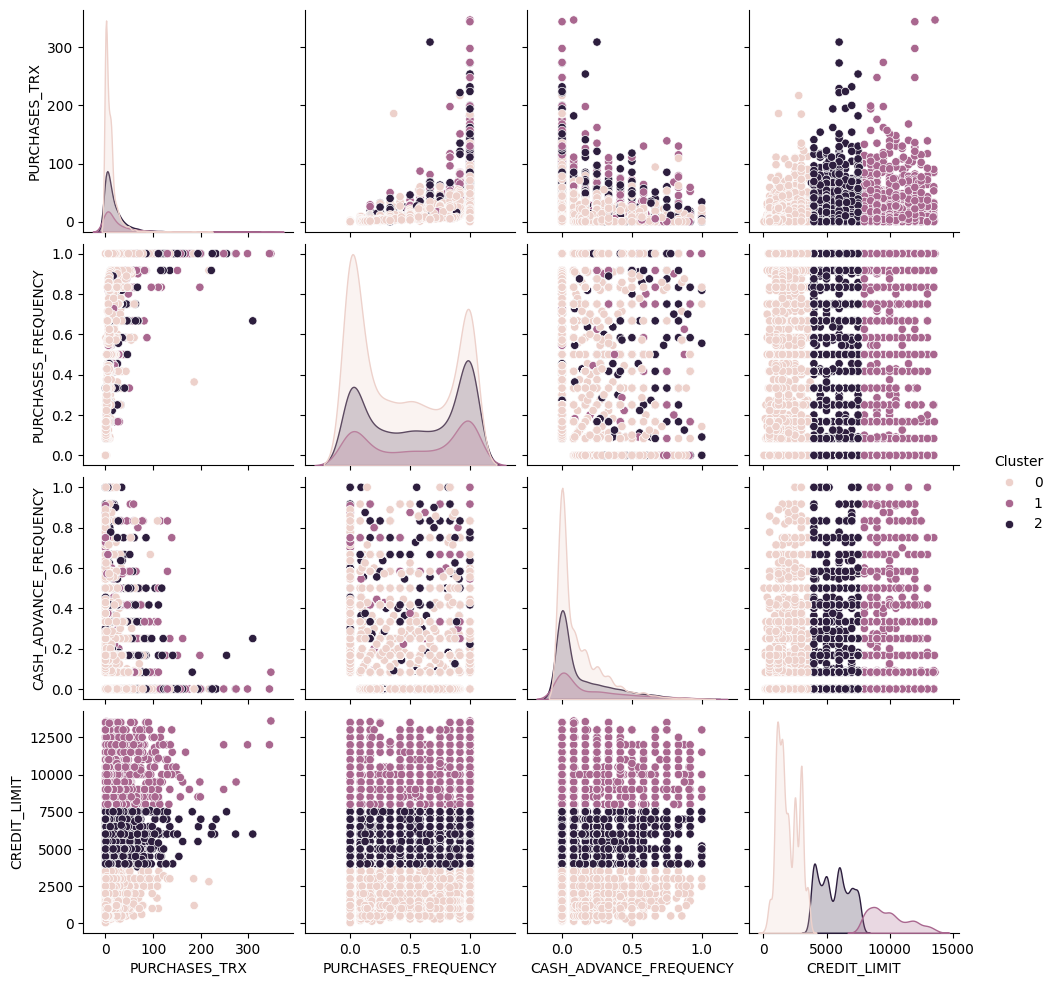

In [ ]:
sns.pairplot(data=df_kmeans_model, hue="Cluster")

In [ ]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data,
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters

    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2]


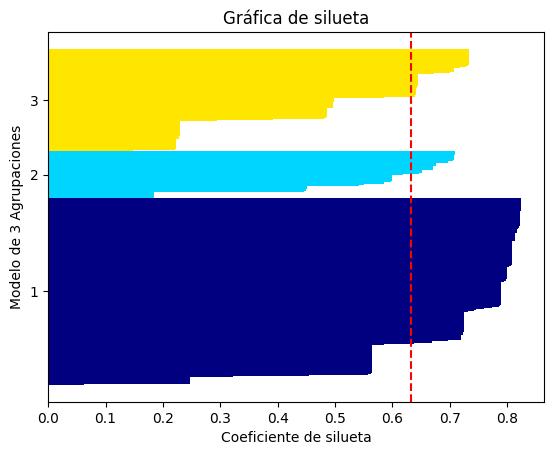

In [ ]:
# Un valor cercano a 1 es un indicador de un bueno modelo.
plot_silhouette(data = df_kmeans_model,
                labels = res_kmeans.labels_,
                ylabel = 'Modelo de 3 Agrupaciones')

Se puede observar que el coeficiente de silueta baja bastante cuando se escogen 3 clusters, por lo que para este caso es mejor segmentar los datos en 2 grupos

### *Modelo 2: DBSCAN (Santiago Pardo)*

Para este modelo, se deben encontrar 2 parámetros con el objetivo de encontrar el mejor modelo, estos parámetros son el epsilon, el cual representa la distancia máxima entre 2 muestras para ser considerados como vecinos, y el parámetro min_samples, que consiste en el número de muestras que un vecindario considera como un punto principal o Core Point.

Para hacer la gráfica de DBSCAN, en primer lugar se parte por realizar una gráfica de distancias vs objetos, basado en el algoritmo de K-Nearest Neighbors, en la cual, de forma similar al método del codo de K-Means, el punto de inflexión representa un tamaño de epsilon cercano al óptimo.

Por otro lado, con respecto al parámetro min_samples, se utilizará un método heurístico el cual determina que este parámetro debe ser mucho mayor a la dimensión de los datos, debido a que si el número es menor, el número de datos se esparce por todos los datos. Por lo que este valor se dejó como el doble de la dimensión de los datos

In [51]:
df_clean_dbscan

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
2,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
4,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12
5,1.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
8,1.000000,861.49,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8954,0.500000,20.90,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8956,1.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8958,0.833333,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8959,0.833333,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


Para este análisis, también se realizará una limpieza Tipo B, en el cual únicamente se analizarán las variables PURCHASES_TRX, PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY y CREDIT_LIMIT

In [52]:
dbscan_clean = df_clean_dbscan[["PURCHASES_TRX", "PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CREDIT_LIMIT"]]
dbscan_data_std = scaler.fit_transform(dbscan_clean)

Para encontrar la gráfica, se utilizó k-nearest neighbors con un número de 2 clusters, el cual fue calculado como el número óptimo de clusters con el algoritmo de K-Means

In [53]:
nn = NearestNeighbors(n_neighbors=2).fit(dbscan_data_std)
distances, indices = nn.kneighbors(dbscan_data_std)

In [54]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

Text(0, 0.5, 'K-Distancia')

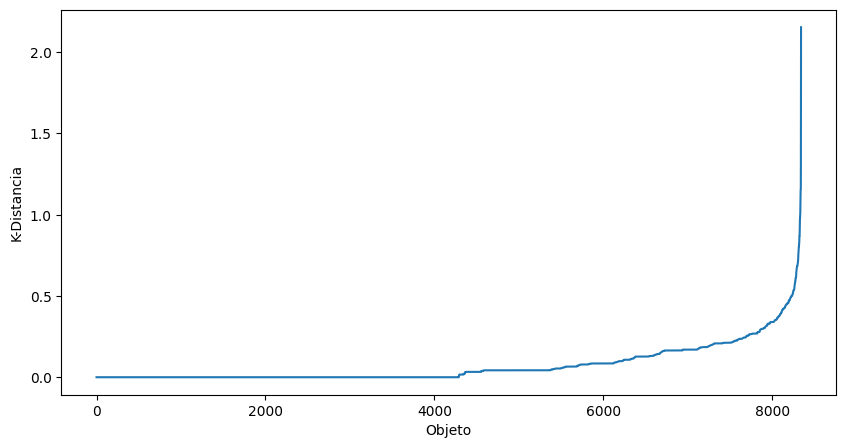

In [55]:
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.xlabel("Objeto")
plt.ylabel("K-Distancia")

In [56]:
dbscan_data_std

array([[-0.5258606 , -0.81268031, -0.68661945, -1.04113546],
       [-0.10102204,  1.26716601, -0.68661945,  1.09673648],
       [-0.56834446, -1.02066669, -0.68661945, -0.97535478],
       ...,
       [-0.39840903,  0.85119574, -0.68661945, -1.04113546],
       [-0.61082831, -1.22865057,  0.1587351 , -1.20558714],
       [ 0.36630038,  0.43522798,  1.00408459, -0.97535478]])

In [57]:
eps = np.arange(0.1,1, 0.01)

output = []
for ep in eps:
  labels = DBSCAN(eps=ep,min_samples=6).fit(dbscan_data_std).labels_
  score = silhouette_score(dbscan_data_std,labels)
  output.append((ep,score))

In [58]:
eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Mejor coeficiente de silueta: {score}")
print(f"eps: {eps}")

Mejor coeficiente de silueta: 0.7055551492784836
eps: 0.9899999999999995


In [59]:
eps_list = []
score_list = []
for i in range(0,len(output)):
  eps_list.append(output[i][0])
  score_list.append(output[i][1])

Text(0, 0.5, 'Coeficiente de Silueta')

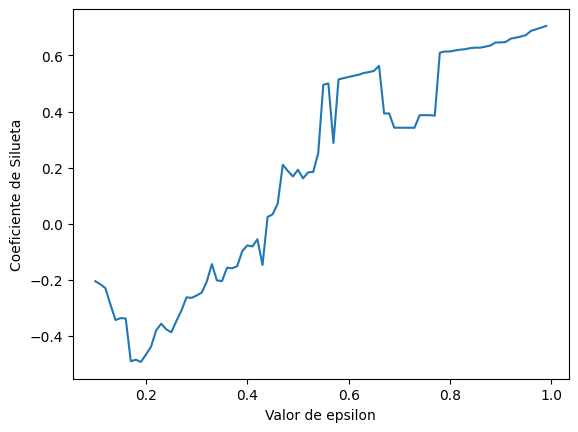

In [60]:
plt.plot(eps_list,score_list)
plt.xlabel("Valor de epsilon")
plt.ylabel("Coeficiente de Silueta")

Basado en el epsilon y el número de muestras encontrado, se procede a encontrar los resultados del mejor modelo

In [61]:
best_dbscan = DBSCAN(eps=0.9899999999999995,min_samples=6)
best_dbscan.fit_predict(dbscan_data_std)
dbscan_labels = best_dbscan.labels_

In [62]:
dbscan_clean['LABELS'] = dbscan_labels

<ipython-input-62-21fd718b540b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_clean['LABELS'] = dbscan_labels


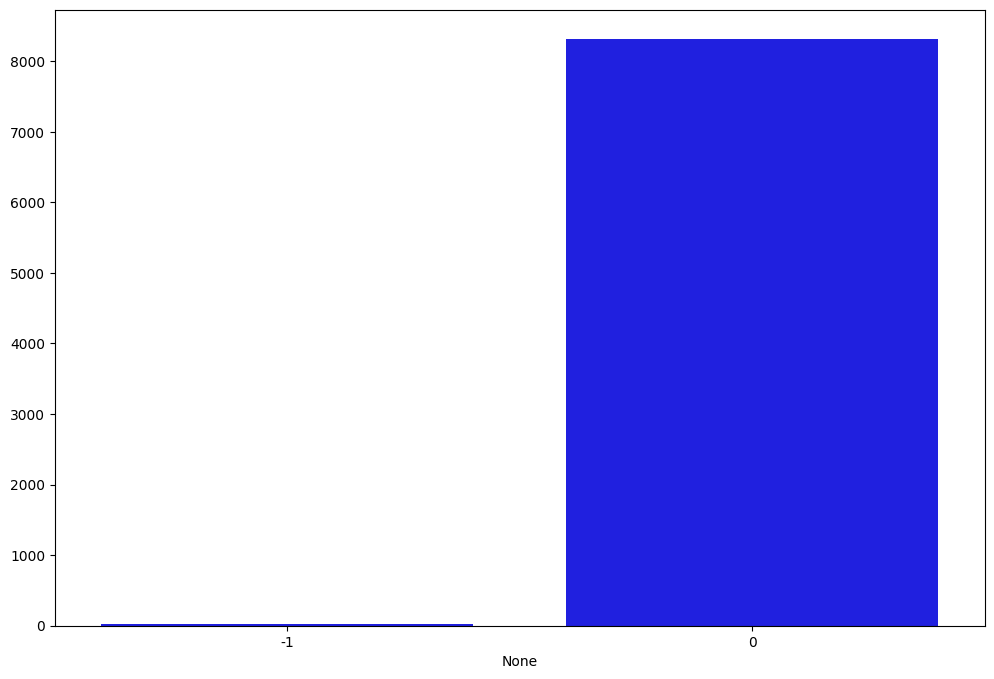

In [63]:
cluster_distrib = dbscan_clean['LABELS'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

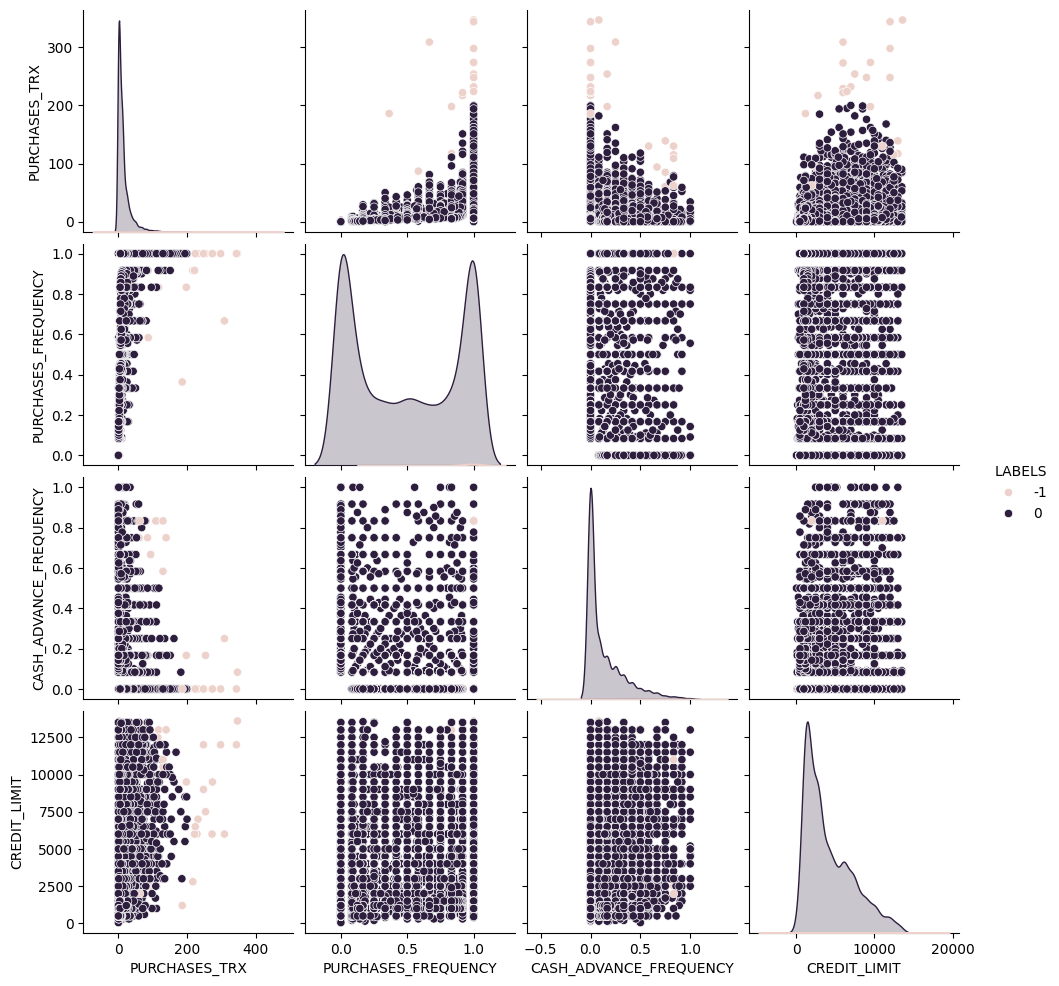

In [64]:
sns.pairplot(data=dbscan_clean, hue="LABELS")

### *Modelo 3: Spectral Clustering (Felipe Rueda)*

Para este análisis, también se realizará una limpieza Tipo B, en el cual únicamente se analizarán las variables PURCHASES_TRX, PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY y CREDIT_LIMIT

In [41]:
sc_clean = df_clean_sc[["PURCHASES_TRX", "PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CREDIT_LIMIT"]]
sc_data_std = scaler.fit_transform(sc_clean)

Para este algoritmo, el único hiperparámetro importante que es necesario calcular es el número de clusters, para ello se realizó una búsqueda de grilla de valores de un número considerable de clusters que pueden ser considerados con el objetivo de obtener el modelo con mejor coeficiente de silueta

In [43]:
clusters = np.array([2,3,4,5,6,7,8,9,10])
output = []

for i in range(0,len(clusters)):
  labels = SpectralClustering(n_clusters=clusters[i]).fit(sc_data_std).labels_
  score = silhouette_score(sc_data_std,labels)
  output.append((clusters[i],score))

In [44]:
output

[(2, 0.8244169249699669),
 (3, 0.7328191363473758),
 (4, 0.6982578372905002),
 (5, 0.5754565132692862),
 (6, 0.5754908118688193),
 (7, 0.5464773828113798),
 (8, 0.5749611030745737),
 (9, 0.5428503576992173),
 (10, 0.44662354682234207)]

In [45]:
k_list = []
score_list = []
for i in range(0,len(output)):
  k_list.append(output[i][0])
  score_list.append(output[i][1])

Text(0, 0.5, 'Coeficiente de Silueta')

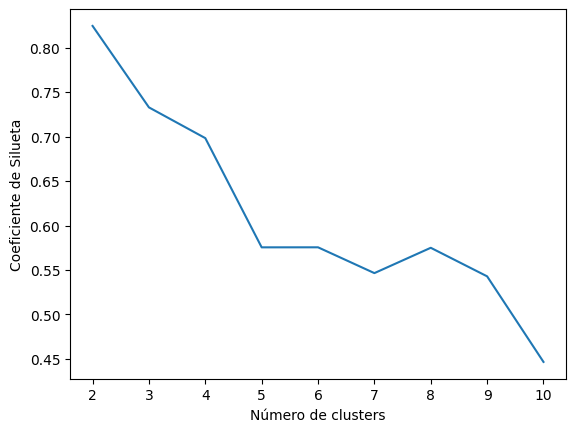

In [46]:
plt.plot(k_list,score_list)
plt.xlabel("Número de clusters")
plt.ylabel("Coeficiente de Silueta")

In [47]:
#Evaluación de Modelo
best_sc = SpectralClustering(n_clusters=2)
best_sc.fit_predict(sc_data_std)
sc_labels = np.array(best_sc.labels_)
sc_clean['LABELS'] = sc_labels

<ipython-input-47-83bf0d874e90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_clean['LABELS'] = sc_labels


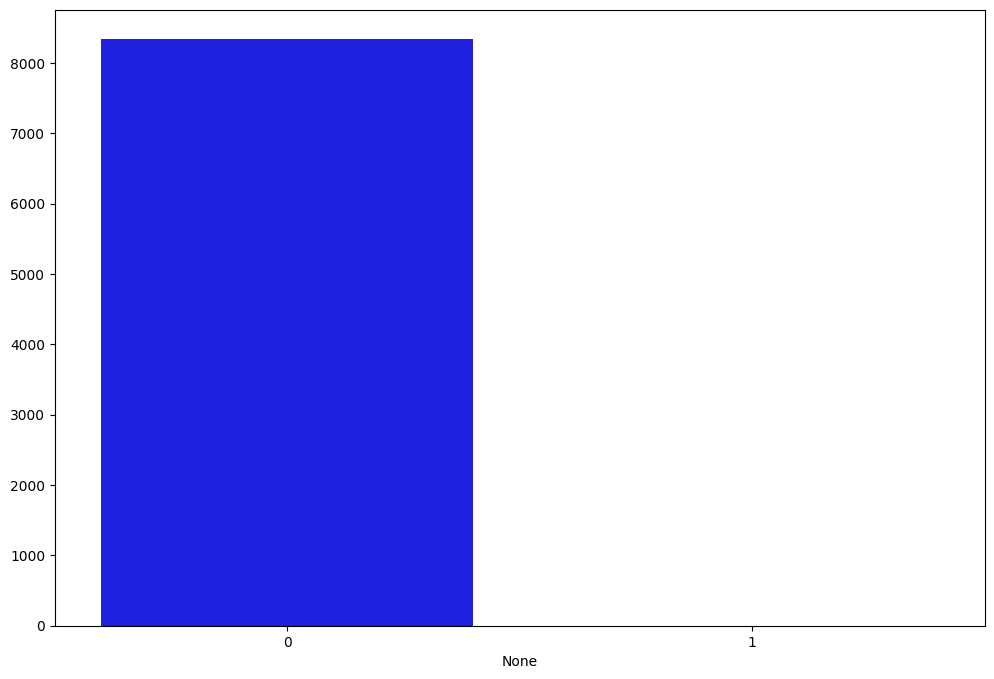

In [48]:
cluster_distrib = sc_clean['LABELS'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [49]:
sc_clean['LABELS'].value_counts()

0    8339
1       2
Name: LABELS, dtype: int64

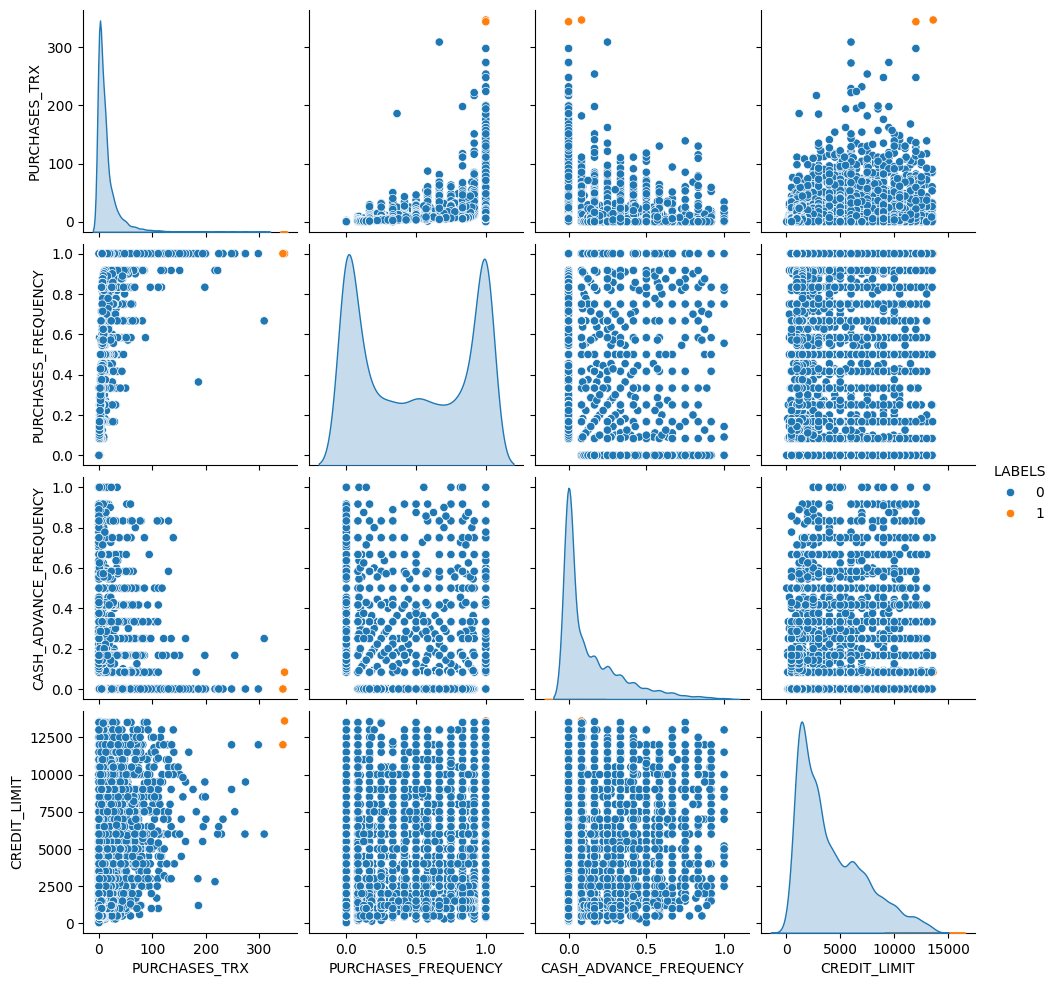

In [50]:
sns.pairplot(data=sc_clean, hue="LABELS")